In [1]:
#Descargamos una imagen de una zona en particular. En este caso de la mision Landsat

# La linea siguiente tiene un codigo que permite descarga una imagen Landsat en particular (solo bandas 1, 2 y 3)
!pylandsat download --files B1.TIF,B2.TIF,B3.TIF LC08_L1TP_007064_20210825_20210901_01_T1

# Para saber el código de una imagen en particular se puede acceder a Earth explorer y buscarla o en GEE

In [2]:
import RivWidthCloud_Python 

!python rwc_landsat_one_image.py LC08_L1TP_022034_20130422_20170310_01_T1 -f csv

python: can't open file 'rwc_landsat_one_image.py': [Errno 2] No such file or directory


In [3]:
!pip install geemap

In [4]:
import ee
import geemap
from geemap.algorithms import river

In [5]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [6]:
point = ee.Geometry.Point([ -73.831287, -5.028182])

In [7]:
image = (
    ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")
    .filterBounds(point)
    .sort("CLOUD_COVER")
    .first()
)

In [8]:
#agregamos al mapa de trabajo
Map.addLayer(image, {'min': 0, 'max': 3000, 'bands': ['B5', 'B4', 'B3']}, "Landsat")
Map.centerObject(image)

In [9]:
river.rwc(image, folder='export', water_method='Jones2019')

LC08_L1TP_006064_20210701_20210708_01_T1 will be exported to export as shp file


True

In [10]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


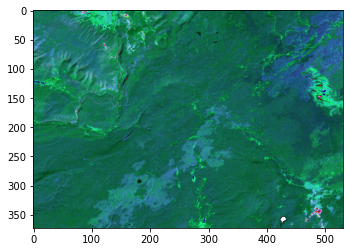

In [11]:
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()

In [12]:
water_mask = ee.ImageCollection(
    "projects/sat-io/open-datasets/GRWL/water_mask_v01_01"
).median()
Map.addLayer(water_mask, {'min': 11, 'max': 125, 'palette': 'blue'}, 'GRWL Water Mask')